# Bayesian Hierarchical Filter Models from 

- Behrens 2007 - http://www.nature.com/neuro/journal/v10/n9/abs/nn1954.html
- Boorman 2016 - http://dx.doi.org/10.1016/j.neuron.2016.02.014

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
%matplotlib inline 



In [2]:
import models
reload(models)
from models import * 

# Switch Models 

### Uniform Priors over switch rate 

In [3]:
folder = os.getcwd()
filee = '/example_sub.csv'

In [4]:
# fit eries data to task with uniform priors 

switch_model = model_switching(model_name='switching_w_uniform_prior',datafile_name=folder+filee)
switch_model.specify_model_subclass(0)
switch_model.load_data()
switch_model.initialize_parameter_range()
switch_model.initialize_transition()
switch_model.initialize_priors()
switch_model.run_inference()
switch_model.calc_ev()
switch_model.param_temp=10
switch_model.calc_prob_choice_softmax()
switch_model.generate_data()

180


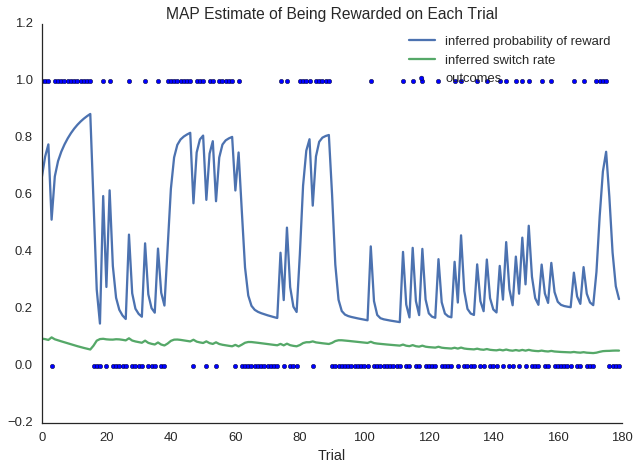

In [10]:
sns.set_style('white')
sns.set_context('talk')
fig,axarray = plt.subplots(1)
sns.despine()
plt.plot(switch_model.ev_q,label='inferred probability of reward')
plt.plot(switch_model.ev_v,label='inferred switch rate')
plt.scatter(np.arange(len(switch_model.outcomes)),
            switch_model.outcomes,label='outcomes')
plt.legend()
plt.xlim(0,180)
axarray.set_xlabel('Trial')
axarray.set_title('MAP Estimate of Being Rewarded on Each Trial')

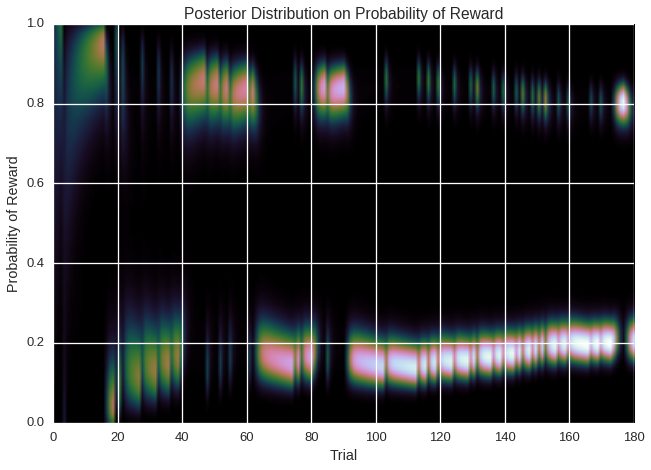

In [8]:
# posterior of R, across trials (shows uncertainty in estimate of r)
sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('talk')
fig,ax = plt.subplots(1,1)
ylims = ax.get_ylim()
xlims = [0,180]
ax.imshow(switch_model.marg_q[:,0:-1],aspect='auto',extent=[xlims[0],xlims[1],ylims[0],ylims[1]],origin='lower')
ax.set_title('Posterior Distribution on Probability of Reward')
ax.set_xlabel('Trial')
ax.set_ylabel('Probability of Reward')


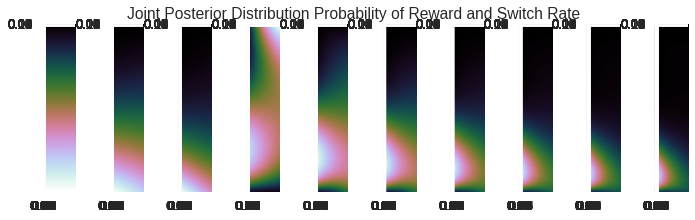

In [11]:

sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('talk')
outs = switch_model.outcomes[0:10]
nrows = int(round(np.sqrt(len(outs))))

fig,axarray = plt.subplots(1,10,figsize=(12,3))
axarray = axarray.flatten()
for trial,y in enumerate(outs):
    axarray[trial].imshow(switch_model.post_dist[:,:,trial].T);
    axarray[trial].set_xticks(switch_model.q_range);
    axarray[trial].set_yticks(switch_model.v_range);
    
fig.suptitle('Joint Posterior Distribution Probability of Reward and Switch Rate')

### Flexible Priors

180
180
180


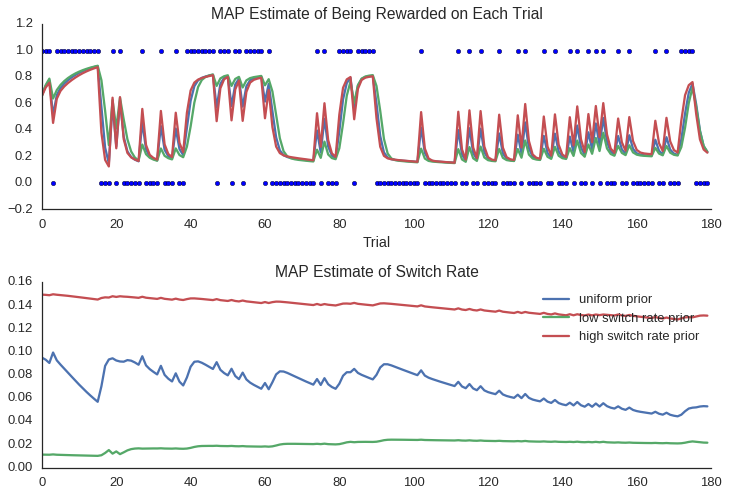

In [17]:
sns.set_style('white')
sns.set_context('talk')
fig,axes = plt.subplots(2,1)
sns.despine()

switch_model = model_switching(model_name='switching_w_uniform',datafile_name=folder+filee)
switch_model.specify_model_subclass(0)
switch_model.load_data()
switch_model.initialize_parameter_range()
switch_model.initialize_transition()
switch_model.initialize_priors()
switch_model.run_inference()
axes[0].plot(switch_model.estimate_r,label='uniform prior')
axes[1].plot(switch_model.ev_v,label='uniform prior')

# eris_q_mean = np.loadtxt('results_validation_switch_model/state_means_ns.txt')
# eris_v_mean = np.loadtxt('results_validation_switch_model/jump_means_ns.txt')
# axes[0].plot(eris_q_mean,label='eries uniform prior')
# axes[1].plot(eris_v_mean,label='eries uniform prior')


switch_model = model_switching(model_name='switching_w_flexible_prior',datafile_name=folder+filee)
switch_model.specify_model_subclass(1)
switch_model.load_data()
switch_model.initialize_parameter_range()
switch_model.initialize_transition()
switch_model.param_v_mu0 = 0.01
switch_model.param_v_sigma0 = 0.01
switch_model.param_q_mu0 = 0.5
switch_model.param_q_sigma0 = 1
switch_model.initialize_priors()
switch_model.run_inference()
axes[0].plot(switch_model.estimate_r,label='low switch rate prior')
axes[1].plot(switch_model.ev_v,label='low switch rate prior')



switch_model = model_switching(model_name='switching_w_flexible_prior',datafile_name=folder+filee)
switch_model.specify_model_subclass(1)
switch_model.load_data()
switch_model.initialize_parameter_range()
switch_model.initialize_transition()
switch_model.param_v_mu0 = 0.15
switch_model.param_v_sigma0 = 0.02
switch_model.param_q_mu0 = 0.5
switch_model.param_q_sigma0 = 1
switch_model.initialize_priors()
switch_model.run_inference()
axes[0].plot(switch_model.estimate_r,label='high switch rate prior')
axes[1].plot(switch_model.ev_v,label='high switch rate prior')


axes[0].scatter(np.arange(len(switch_model.outcomes)),
            switch_model.outcomes,label='outcomes')

axes[0].set_xlim(0,180)
axes[0].set_xlabel('Trial')
axes[0].set_title('MAP Estimate of Being Rewarded on Each Trial')
axes[1].set_title('MAP Estimate of Switch Rate')

plt.legend()

plt.tight_layout()
#switch_model.generate_data()

# Hierarchical Gaussian Model

### Uniform Priors on Volatility and MetaVolatility 

In [13]:
gaussian_model = model_gaussian_rw(model_name='gaussian_w_uniform_prior',datafile_name=folder+filee)
gaussian_model.specify_model_subclass(0)
gaussian_model.load_data()
gaussian_model.initialize_parameter_range()
gaussian_model.initialize_transition()
gaussian_model.initialize_priors()
gaussian_model.run_inference()
gaussian_model.calc_ev()
gaussian_model.param_temp=10
gaussian_model.calc_prob_choice_softmax()
gaussian_model.generate_data()

180


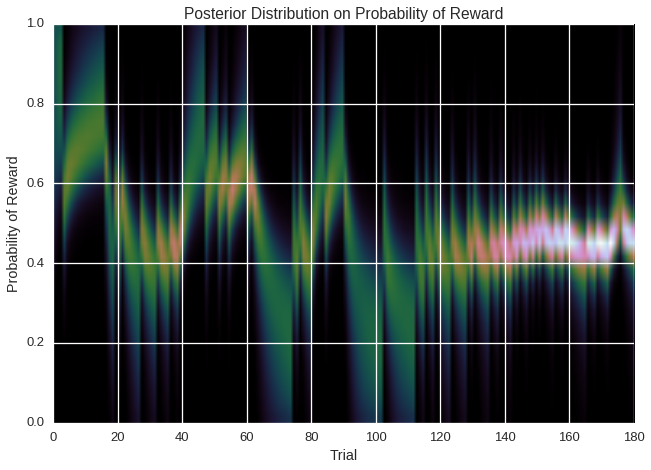

In [14]:
# posterior of R, across trials (shows uncertainty in estimate of r)
sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('talk')
fig,ax = plt.subplots(1,1)
ylims = ax.get_ylim()
xlims = [0,180]
ax.imshow(gaussian_model.marg_r[:,0:-1],aspect='auto',extent=[xlims[0],xlims[1],ylims[0],ylims[1]],origin='lower')
ax.set_title('Posterior Distribution on Probability of Reward')
ax.set_xlabel('Trial')
ax.set_ylabel('Probability of Reward')

### Different  Priors 


In [15]:
# model = model_gaussian_rw(model_name='gaussian_w_fitted_prior',datafile_name=folder+filee)
# model.initialize_parameter_range() # have to do this for this model
# model.specify_model_subclass(1)
# model.load_data()
# model.fit_parameters()

180
180
180
180


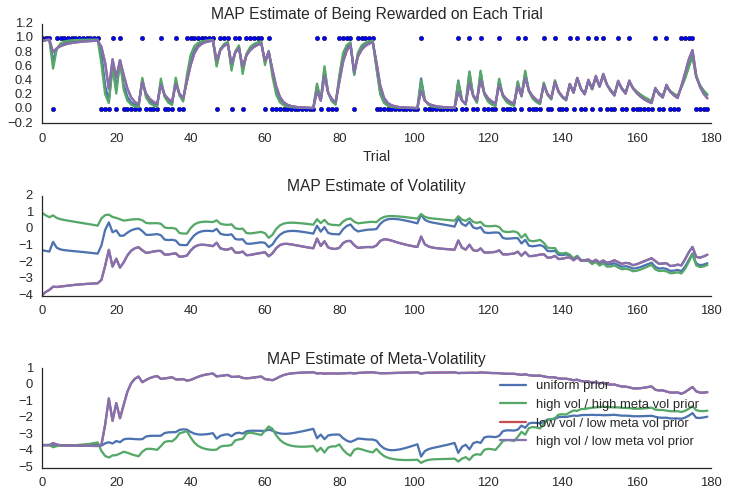

In [18]:
sns.set_style('white')
sns.set_context('talk')
fig,axes = plt.subplots(3,1)
sns.despine()

model = model_gaussian_rw(model_name='guassian_w_uniform',datafile_name=folder+filee)
model.specify_model_subclass(0)
model.load_data()
model.initialize_parameter_range()
model.initialize_transition()
model.initialize_priors()
model.run_inference()
axes[0].plot(model.estimate_r,label='uniform prior')
axes[1].plot(model.ev_v[0:-1],label='uniform prior')
axes[2].plot(model.ev_k[0:-1],label='uniform prior')

# eris_q_mean = np.loadtxt('results_validation_switch_model/state_means_ns.txt')
# eris_v_mean = np.loadtxt('results_validation_switch_model/jump_means_ns.txt')
# axes[0].plot(eris_q_mean,label='eries uniform prior')
# axes[1].plot(eris_v_mean,label='eries uniform prior')


model = model_gaussian_rw(model_name='gaussian_w_flexible_prior',datafile_name=folder+filee)
model.initialize_parameter_range()
model.specify_model_subclass(1)
model.load_data()
model.initialize_transition()
model.param_v_mu0 = 1
model.param_v_sigma0 = 0.1
model.param_k_mu0 = 1
model.param_k_sigma0 = .1
model.initialize_priors()
model.run_inference()
axes[0].plot(model.estimate_r,label='high vol / high meta vol prior')
axes[1].plot(model.ev_v[0:-1],label='high vol / high meta vol prior')
axes[2].plot(model.ev_k[0:-1],label='high vol / high meta vol prior')


model = model_gaussian_rw(model_name='gaussian_w_flexible_prior',datafile_name=folder+filee)
model.initialize_parameter_range()
model.specify_model_subclass(1)
model.load_data()
model.initialize_transition()
model.param_v_mu0 = -4
model.param_v_sigma0 = 0.1
model.param_k_mu0 = -4
model.param_k_sigma0 = .1
model.initialize_priors()
model.run_inference()
axes[0].plot(model.estimate_r,label='low vol / low meta vol prior')
axes[1].plot(model.ev_v[0:-1],label='low vol / low meta vol prior')
axes[2].plot(model.ev_k[0:-1],label='low vol / low meta vol prior')

model = model_gaussian_rw(model_name='gaussian_w_flexible_prior',datafile_name=folder+filee)
model.initialize_parameter_range()
model.specify_model_subclass(1)
model.load_data()
model.initialize_transition()
model.param_v_mu0 = 1
model.param_v_sigma0 = 0.1
model.param_k_mu0 = -4
model.param_k_sigma0 = .1
model.initialize_priors()
model.run_inference()
axes[0].plot(model.estimate_r,label='high vol / low meta vol prior')
axes[1].plot(model.ev_v[0:-1],label='high vol / low meta vol prior')
axes[2].plot(model.ev_k[0:-1],label='high vol / low meta vol prior')

# add outcomes # 
axes[0].scatter(np.arange(len(switch_model.outcomes)),
            switch_model.outcomes,label='outcomes')

axes[0].set_xlim(0,180)

axes[0].set_xlabel('Trial')
axes[0].set_title('MAP Estimate of Being Rewarded on Each Trial')
axes[1].set_title('MAP Estimate of Volatility')
axes[2].set_title('MAP Estimate of Meta-Volatility')
plt.tight_layout()
plt.legend()
